In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [16]:
train_nlp = pd.read_csv('nlp_train.csv')
test_nlp = pd.read_csv('nlp_test.csv')
train_num = pd.read_csv('numericals_train.csv')
test_num = pd.read_csv('numericals_test.csv')

In [17]:
train_nlp.columns = ['id','true','pred_nlp','prob_nlp']
test_nlp.columns = ['id','true','pred_nlp','prob_nlp']
train_num.columns = ['id','true','pred_num','prob_num']
test_num.columns = ['id','true','pred_num','prob_num']

In [18]:
nlp = pd.concat([train_nlp,test_nlp])
num = pd.concat([train_num,test_num])

In [19]:
nlp.shape[0]

131206

In [20]:
num.shape[0]

130288

In [21]:
df = nlp.merge(num, on=['id','true'], how='inner')

In [22]:
df.shape[0]

131105

In [23]:
df = df.drop_duplicates()

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128941 entries, 0 to 131104
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   prob_nlp  128941 non-null  float64
 1   prob_num  128941 non-null  float64
dtypes: float64(2)
memory usage: 3.0 MB


In [26]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,[3,5]]
y = df.iloc[:,1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
#model evaluations on the test set
def model_evaluate(y_test, y_pred):
  print(f"Test F1 Score: {f1_score(y_test, y_pred)}")
  print(f"Test Precision Score: {precision_score(y_test, y_pred)}")
  print(f"Test Recall Score: {recall_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))
  print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

lr = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = lr.predict(X_val)

In [27]:
model_evaluate(y_val, y_pred)

Test F1 Score: 0.9730331243740495
Test Precision Score: 0.9796101277167825
Test Recall Score: 0.9665438467207075
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     25113
           1       0.98      0.97      0.97     13570

    accuracy                           0.98     38683
   macro avg       0.98      0.98      0.98     38683
weighted avg       0.98      0.98      0.98     38683

Confusion Matrix:
 [[24840   273]
 [  454 13116]]


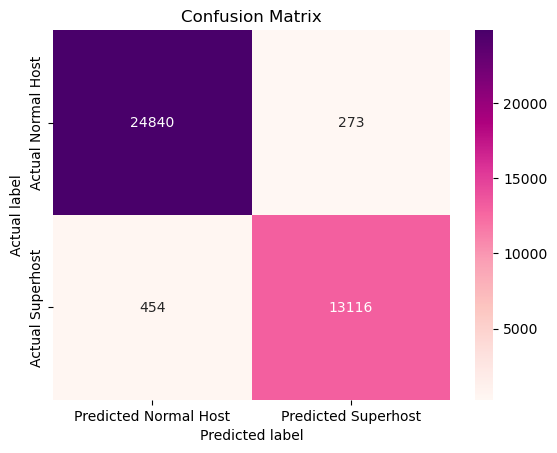

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='RdPu', fmt='g', xticklabels=['Predicted Normal Host', 'Predicted Superhost'], yticklabels=['Actual Normal Host', 'Actual Superhost'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [32]:
45595/(45595+85793)

0.3470256035558803

In [37]:
lr.coef_

array([[14.862882  ,  5.68462387]])